<a href="https://colab.research.google.com/github/ms-KeiFujiwara/home-work/blob/main/Julia162_memoProgClass2021w_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_



# 日本語版

この notebook の元の（英語の）解説は、次の記事にあります。

https://discourse.julialang.org/t/julia-on-google-colab-free-gpu-accelerated-shareable-notebooks/15319/43?

# 使い方
0. Google にアカウントを作っておきます

1. 今見ている notebook を 自分の Google Drive にコピーします
  - メニューから 「_ファイル_ > _ドライブにコピーを保存_」 と進みます.
  - 以後、コピーされたファイルで作業します
  
2. GPUを使わない設定にします.
  - メニューから「_ランタイム_ > _ランタイムのタイプを変更_」
  - 「_ハードウエア アクセラレータ_ = _None_」 として「保存」

3. この下にある「Setup = 設定」節を見つけます。
  - 節表題の下に「1個のセルが非表示」と書いてある場合には、節表題の左側の右向き三角形「▶」をクリックします。「▼」に変わります。

  ![hidden_code_cell](https://i.gyazo.com/27efde3ae629c6d12fc484c71754b573.png)

4. `%%shell` から始まるコードセルが見つかります。
   
  ![setupCodeCell](https://i.gyazo.com/eb7337953ff4c7939f65ae409fad6235.png)


5. そのコードセルを実行します。
    - `%%shell`  の左側の `[1]` 上にカーソルを置くと「![triangle](https://i.gyazo.com/787befb794c798a253dac970475357fb.png)」シンボル（黒丸の中に、白抜き右向き三角形）が現れます。 
      - そのシンボルをクリックします。  
    - 別の方法
      - そのセルを選びます。
      - `Ctrl` キー を押しながら `Enter` キーを押します。（以後、「`Ctrl+Enter` を押す」と書きます）
  - 以下のメッセージが表示されるかもしれませんが、末尾の「×」を押してください (警告を無視します)。
  ![python2](https://i.gyazo.com/a359fd093cac142d1a67e655b52250c2.png)
  - 実行すると、いくつかのパッケージがインストールされます
  - 実行には数分かかります。

6. セルの実行が終わるまで待ちます。
  - 実行に成功すると、以下のメッセージが表示されます。
  > `Success! Please reload this page and jump to the next section.`

7. このページを再読込します。
  - 用いているブラウザに応じて `Ctrl+R`， `⌘+R`， `F5キー` のいずれかを押します。
  
8. 「Checking the Installation」節のコードセルから実行を始めます。
  - コードセル内のコードを実行するには
    - `SHIFT` キー を押しながら `Enter`キーを押します（以後、「`SHIFT+Enter` を押す」と書きます）
    - または、「![triangle](https://i.gyazo.com/787befb794c798a253dac970475357fb.png)」シンボルを押します。
  - `versioninfo()` を実行すると、Julia 言語のバージョンが表示されます。
  - 続けて、以下の節内のコードセルを上から順番に実行してください。
    - Unitful 
    - PyPlot 
9. Notebook名を変更します。
  - メニューから「_ファイル_ > _ノートブック名を変更_」
  - ページ上部のファイル名を変更して、`[ENTER]` キーを押します。
  - ファイル名末尾は `.ipynb` の拡張子で終わるようにします。
10. 現在作業中のファイルを、適宜保存します。
  - メニューから「_ファイル_ > _保存_」
  - プログラム作成・実行中も「保存」の操作をしましょう。   


# Instructions

1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Find the first code cell starting from the line `%%shell` and excute it (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

# Setup = 設定

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools PyPlot PyCall Unitful DataFrames CSV NLsolve"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.2 on the current Colab Runtime...
2022-02-06 04:56:20 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.2-linux-x86_64.tar.gz [112946671/112946671] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
┌ Warning: The Pkg REPL interface is intended for interactive use, use with caution from scripts.
└ @ Pkg.REPLMode /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.6/Pkg/src/REPLMode/REPLMode.jl:378
  Installing known registries into `~/.julia`
       Added registry `General` to `~/.julia/registries/General`
   Resolving package versions...
   Installed libsodium_jll ─── v1.0.20+0
   Installed SoftGlobalScope ─ v1.1.0
   Installed Conda ─────────── v1.6.0
   Installed VersionParsing ── v1.3.0
   Installed ZMQ ───────────── v1.2.1
   Installed MbedTLS ───────── v1.0.3
   Installed IJulia ────────── v1.23.2
   Installed JLLWrappers ───── v1.4.1
   Installed ZeroMQ_jll ────── v4.3.4+0
   Installed Preferences ───── v1.2

# You can start Julia Session

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

## GPU

In [ ]:
using BenchmarkTools
if ENV["COLAB_GPU"] == "1"
    using CuArrays

    M_gpu = cu(M)
    @benchmark CuArrays.@sync M_gpu^2
else
    println("No GPU found.")
end

## Benchmark

In [ ]:
using BenchmarkTools

M = rand(2048, 2048)
@benchmark M^2

## Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
Environment:
  JULIA_NUM_THREADS = 2


# Unitful のテスト


In [ ]:
using Unitful

In [ ]:
1u"m"  # 1 m または 1u"m" と印刷されればOK

1 m

# PyPlotのテスト


In [ ]:
using PyPlot

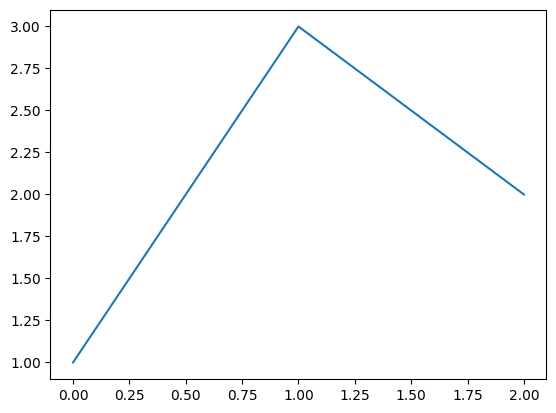

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3235b6ced0>

In [ ]:
plot([1,3,2])

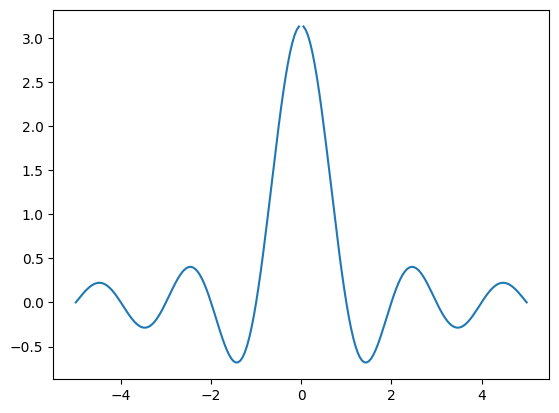

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3228f2e1d0>

In [ ]:
xs=-5:0.05:5
ys=sinpi.(xs)./xs
plot(xs, ys)

# ここから自分のプログラムを書き始めます




In [ ]:
using PyPlot

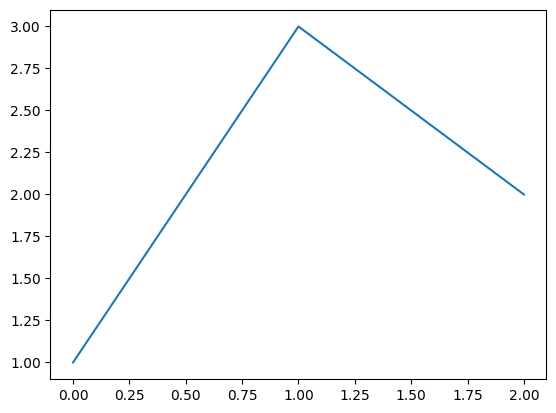

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3228e9b890>

In [ ]:
plot([1,3,2])

In [ ]:
1/0

Inf

In [ ]:
1/2

0.5

In [ ]:
1/0

Inf

In [ ]:
-1/0

-Inf

In [ ]:
0/0

NaN

In [ ]:
xs=-3:1:3

-3:1:3

In [ ]:
ys= 1 ./ xs

7-element Vector{Float64}:
 -0.3333333333333333
 -0.5
 -1.0
 Inf
  1.0
  0.5
  0.3333333333333333

In [ ]:
using PyPlot

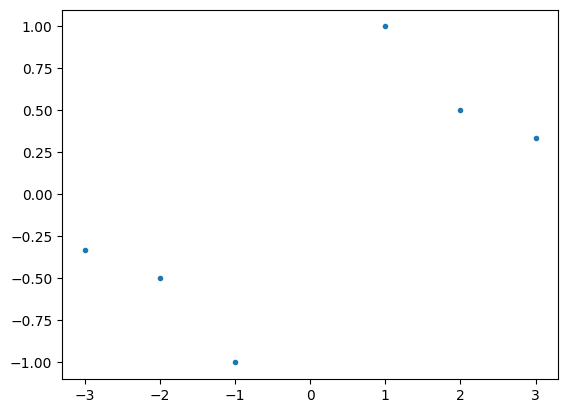

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3228e149d0>

In [ ]:
plot(xs,ys, ".")

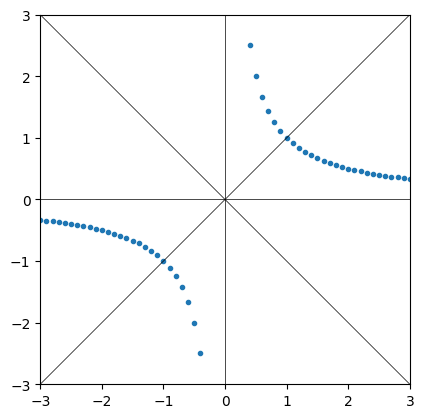

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3228f6bb50>

In [ ]:
xs=-3:0.1:3
ys=1 ./ xs
plot(xs, ys, ".")
plt.axes().set_aspect("equal")
xlim(-3,3)
ylim(-3,3)
axhline(0, lw=0.5, color="k")
axvline(0, lw=0.5, color="k")
plot(xs, xs, lw=0.5, color="k")
plot(xs, -1 * xs, lw=0.5, color="k" )

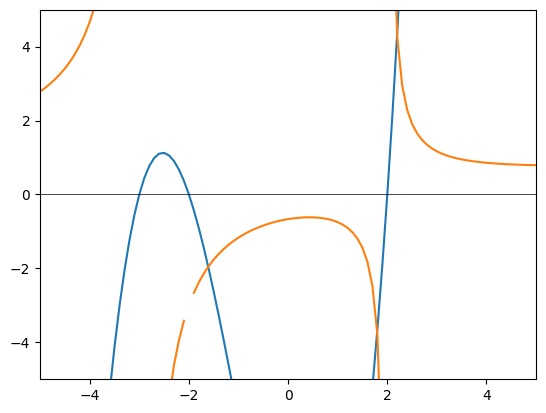

PyObject <matplotlib.lines.Line2D object at 0x7f3228cf9190>

In [ ]:
xs= -10:0.1:10
qs= xs.^3 .+ 3 * xs.^2  .- 4*xs  .- 12
ps= xs.^3 .+ 8 # ####
rs=ps ./ qs
plot(xs, qs)
plot(xs, rs ) #, ".")
ylim(-5, 5)
xlim(-5,5)
axhline(0, lw=0.5, color="k")

In [ ]:
tan(pi/4)

0.9999999999999999

In [ ]:
tan(pi/2)

1.633123935319537e16

In [ ]:
tan(-pi/2)

-1.633123935319537e16

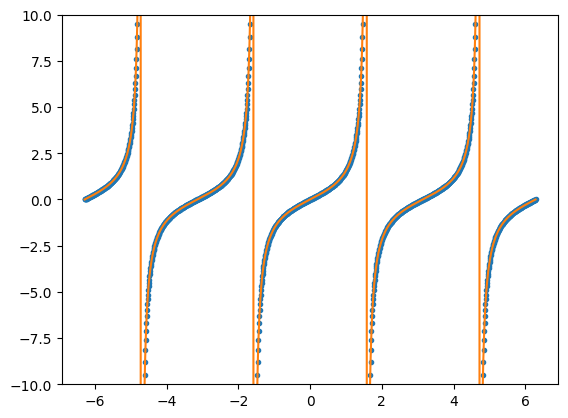

(-10.0, 10.0)

In [ ]:
ts=-2pi:pi/360:2pi
ys=tan.(ts) ;
plot(ts, ys, ".")
plot(ts, ys)
ylim(-10, 10)

In [ ]:
1+1

2

数式x　y
x+y,x^2sin(x)*1/2,x^(2a)/2